In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from policy_evaluator_exp3_tuned_epoch import policy_evaluator_EXP3_Tuned

In [2]:
data = pd.read_csv('../Big Data/big_dataset_20000_minimum_reviews.csv', index_col='Unnamed: 0')
df = data[['time', 'movie_id', 'user_id', 'binary_rating', 'exp_rating']].copy()
df.rename(columns={"exp_rating": "rating"}, inplace = True)
df.head()

,time,movie_id,user_id,binary_rating,rating
0,0,2571,117346,0,0.75
1,1,1196,23499,1,1.00
2,2,2987,100963,0,0.50
3,3,2,10060,0,0.75
4,4,344,155856,1,1.00


In [3]:
# We set the number of epochs
epochs = 4

payoffs_exp3 = policy_evaluator_EXP3_Tuned(df, eta=0.7, rho=0.05, epochs=epochs)

pd.DataFrame(payoffs_exp3).to_csv(f'../Plots Big Data/Data/exp3_tuned_0.7_0.05_{epochs}_epochs.csv')

exp3 begins
Epoch  0
progression : 10 %
progression : 20 %
progression : 30 %
progression : 40 %
progression : 50 %
progression : 60 %
progression : 70 %
progression : 80 %
progression : 90 %
Epoch  1
progression : 10 %
progression : 20 %
progression : 30 %
progression : 40 %
progression : 50 %
progression : 60 %
progression : 70 %
progression : 80 %
progression : 90 %
Epoch  2
progression : 10 %
progression : 20 %
progression : 30 %
progression : 40 %
progression : 50 %
progression : 60 %
progression : 70 %
progression : 80 %
progression : 90 %
Epoch  3
progression : 10 %
progression : 20 %
progression : 30 %
progression : 40 %
progression : 50 %
progression : 60 %
progression : 70 %
progression : 80 %
progression : 90 %


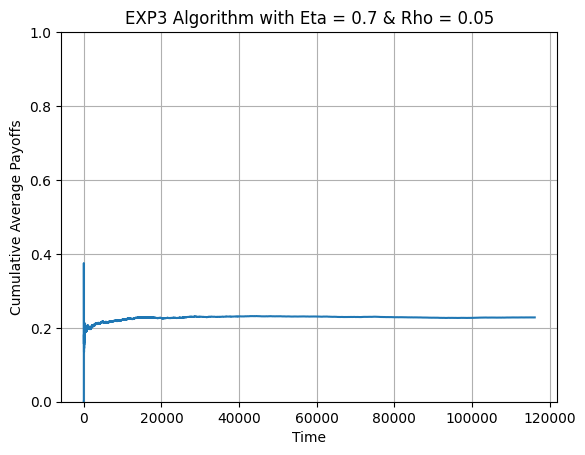

In [4]:
cumulative_average_exp3 = np.cumsum(payoffs_exp3) / np.arange(1, len(payoffs_exp3)+1)

plt.plot(cumulative_average_exp3)
plt.xlabel("Time")
plt.ylabel("Cumulative Average Payoffs")
plt.title("EXP3 Algorithm with Eta = 0.7 & Rho = 0.05")
plt.ylim(0, 1)
plt.grid(True)

plt.savefig(f'../Plots Big Data/Images/exp3_tuned_0.7_0.05_{epochs}_epochs.png', dpi = 300)
plt.show()